In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../")
from Plotting.generate_database import ResultsDatabaseGenerator
from Plotting.Plot import BasicPlot, MultiPlot
import pandas as pd
import matplotlib as mpl
colors =   ["#5dd448",
            "#bfa900",
            "#ec742f",
            "#e9496f",
            "#b04ca4",]

colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#CC6677", "#882255", "#AA4499"]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.linewidth"] = 0.5

%load_ext autoreload
%autoreload 2

Invalid: 1
Invalid: 5
Invalid: 6
Invalid: 7
Invalid: 8
Invalid: 9
Invalid: 10
Invalid: 11
Invalid: 12


,network_type,num_qumodes,acc,val_acc,loss,val_loss
3,classical,2,"[0.5626118183135986, 0.7701252102851868, 0.791...","[0.675000011920929, 0.7541666626930237, 0.7958...","[0.6675137877464294, 0.5667344927787781, 0.487...","[0.6323075890541077, 0.5462256073951721, 0.490..."
14,classical,3,"[0.6386404037475586, 0.7835420370101929, 0.795...","[0.737500011920929, 0.7666666507720947, 0.7791...","[0.6781533360481262, 0.5584369897842407, 0.476...","[0.6602806448936462, 0.5387874245643616, 0.482..."
17,classical,4,"[0.6109123229980469, 0.7996422052383423, 0.797...","[0.800000011920929, 0.7666666507720947, 0.7916...","[0.6636890769004822, 0.5391085743904114, 0.484...","[0.6020071506500244, 0.534113883972168, 0.4907..."
4,classical,5,"[0.6538461446762085, 0.7844364643096924, 0.791...","[0.75, 0.7458333373069763, 0.7833333611488342,...","[0.6547917127609253, 0.5323660969734192, 0.479...","[0.5928009748458862, 0.538654088973999, 0.4871..."
21,classical_tf,2,"[0.5626118183135986, 0.7701252102851868, 0.791...","[0.675000011920929, 0.7541666626930237, 0.7958...","[0.6675137877464294, 0.5667344927787781, 0.487...","[0.6323075890541077, 0.5462256073951721, 0.490..."
18,classical_tf,3,"[0.6386404037475586, 0.7835420370101929, 0.795...","[0.737500011920929, 0.7666666507720947, 0.7791...","[0.6781533360481262, 0.5584369897842407, 0.476...","[0.6602806448936462, 0.5387874245643616, 0.482..."
20,classical_tf,4,"[0.6109123229980469, 0.7996422052383423, 0.797...","[0.800000011920929, 0.7666666507720947, 0.7916...","[0.6636890769004822, 0.5391085743904114, 0.484...","[0.6020071506500244, 0.534113883972168, 0.4907..."
19,classical_tf,5,"[0.6538461446762085, 0.7844364643096924, 0.791...","[0.75, 0.7458333373069763, 0.7833333611488342,...","[0.6547917127609253, 0.5323660969734192, 0.479...","[0.5928009748458862, 0.538654088973999, 0.4871..."
2,quantum,2,"[0.613595724105835, 0.7674418687820435, 0.7871...","[0.7166666388511658, 0.7333333492279053, 0.75,...","[0.6819133162498474, 0.6011596322059631, 0.527...","[0.6556258797645569, 0.5896766781806946, 0.527..."
16,quantum,3,"[0.6663685441017151, 0.7906976938247681, 0.799...","[0.7791666388511658, 0.75, 0.762499988079071, ...","[0.6737478375434875, 0.5815010666847229, 0.513...","[0.6403583884239197, 0.5689681768417358, 0.515..."


0
0
0
0
1
1
1
1
2
2
2
2


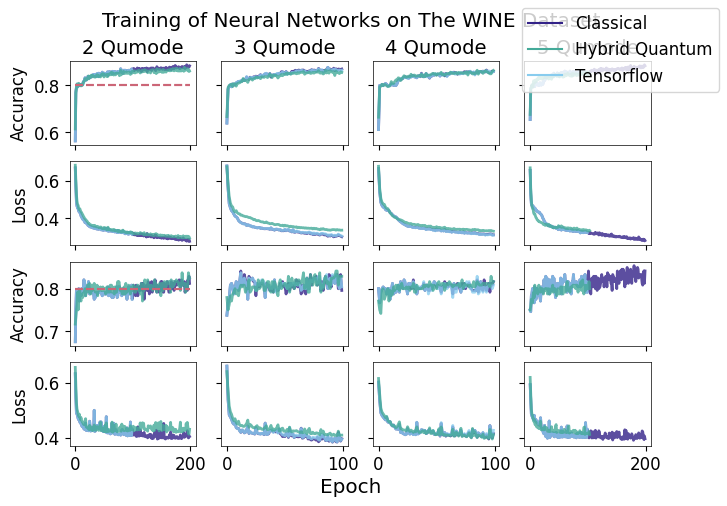

In [9]:
ex_path = "WINE_Hybrid_Base_Experiment"
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder(ex_path)
data = dbGen.data
config = data[2]['config']
config.pop('__doc__', None)
#config.pop('iteration', None)
df = pd.DataFrame(columns=config.keys())
df['acc'] = np.nan
df['val_acc'] = np.nan
df['loss'] = np.nan
df['val_loss'] = np.nan
for i in range(1, 22):
    try:
        config = data[i]['config']
        config.pop('__doc__', None)
        #config.pop('iteration', None)
        metrics = data[i]['metrics']
        metrics.pop('epoch',None)
        acc, loss, val_acc, val_loss = metrics.values()
        acc = np.array(acc)
        assert (acc.shape[-1] == 200 or acc.shape[-1] == 100 or acc.shape[-1] == 104)
        loss = np.array(loss)
        val_acc = np.array(val_acc)
        val_loss = np.array(val_loss)
        df.loc[i] = [*config.values(), acc, val_acc, loss, val_loss]
    except (KeyError, AssertionError):
        print(f"Invalid: {i}")
df = df.sort_values(['network_type', 'num_qumodes'])
display(df)
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(7.5, 5), sharey='row', sharex='col')
for i, dat in enumerate(df['acc']):
    x = np.arange(len(dat))
    y = dat
    print(i//4)
    ax[0,i%4].plot(x, y, lw=2, color=colors[i//4], alpha=0.8)

for i, dat in enumerate(df['loss']):
    x = np.arange(len(dat))
    y = dat
    ax[1,i%4].plot(x, y, lw=2, color=colors[i//4], alpha=0.8 )

for i, dat in enumerate(df['val_acc']):
    x = np.arange(len(dat))
    y = dat
    ax[2,i%4].plot(x, y, lw=2, color=colors[i//4], alpha=0.8)

for i, dat in enumerate(df['val_loss']):
    x = np.arange(len(dat))
    y = dat
    ax[3,i%4].plot(x, y, lw=2, color=colors[i//4], alpha=0.8)

fig.supxlabel('Epoch')
for j,i in enumerate(ax[0]):
    i.set_title(f'{j+2} Qumode', fontsize=14)
ax[0,0].hlines([0.8, 0.8], xmin=0, xmax=200, color=colors[6], linestyles='--')
ax[2,0].hlines([0.8, 0.8], xmin=0, xmax=200, color=colors[6], linestyles='--')
ax[0,0].set_ylabel('Accuracy')
ax[1,0].set_ylabel('Loss')
ax[2,0].set_ylabel('Accuracy')
ax[3,0].set_ylabel('Loss')
plt.plot([], color=colors[0], label='Classical')
plt.plot([], color=colors[2], label='Hybrid Quantum')
plt.plot([], color=colors[1], label='Tensorflow')
fig.legend()
fig.suptitle('Training of Neural Networks on The WINE Dataset')
plt.savefig('HybridTraining.pdf')
plt.show()


In [4]:
ex_path = "WINE_Hybrid_PWB_Experiment"
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder(ex_path)
data = dbGen.data
config = data[1]['config']
config.pop('__doc__', None)
df = pd.DataFrame(index=data.keys(), columns=config.keys())
df['avg_acc'] = np.nan
df['acc_err'] = np.nan
df['avg_loss'] = np.nan
df['loss_err'] = np.nan
for i in range(1, len(data) + 1):
    config = data[i]['config']
    config.pop('__doc__', None)
    metrics = data[i]['metrics']
    metrics.pop('epoch',None)
    acc, loss = metrics.values()
    avg_acc = np.mean(acc)
    acc_err = np.std(acc)
    avg_loss = np.mean(loss)
    loss_err = np.std(loss)
    df.loc[i] = [*config.values(), avg_acc, acc_err, avg_loss, loss_err]

df = df.sort_values('sigma')

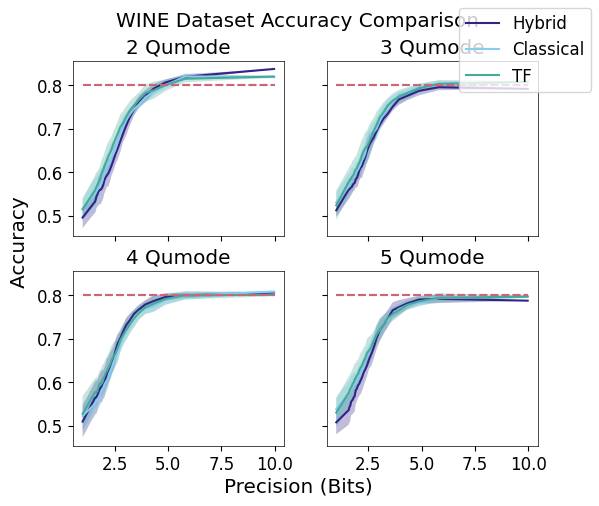

In [7]:
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,5), sharex=True, sharey=True)
fig.supxlabel('Precision (Bits)')
fig.supylabel('   Accuracy')
fig.suptitle('WINE Dataset Accuracy Comparison')
for i in range(2,6):

    mask = (df['network_type']=='quantum') & (df['num_qumodes']==i)

    x1 = np.array(df[mask]['sigma'].unique()).astype(float)
    x1 = np.log2(1+1/x1)

    acc_q = df[mask]['avg_acc']
    acc_err_q = df[mask]['acc_err']
    loss_q = df[mask]['avg_loss']
    loss_err_q = df[mask]['loss_err']

    mask = (df['network_type']=='classical') & (df['num_qumodes']==i)

    x2 = np.array(df[mask]['sigma'].unique()).astype(float)
    x2 = np.log2(1+1/x2)
    
    acc_c = df[mask]['avg_acc']
    acc_err_c = df[mask]['acc_err']
    loss_c = df[mask]['avg_loss']
    loss_err_c = df[mask]['loss_err']
    
    mask = (df['network_type']=='classical_tf') & (df['num_qumodes']==i)

    x3 = np.array(df[mask]['sigma'].unique()).astype(float)
    x3 = np.log2(1+1/x3)
    
    acc_tf = df[mask]['avg_acc']
    acc_err_tf = df[mask]['acc_err']
    loss_tf = df[mask]['avg_loss']
    loss_err_tf = df[mask]['loss_err']
    plot_pos = ((i-2)//2,(i-2)%2) 
    line_q = ax[plot_pos].plot(x1, acc_q, label='Hybrid')
    ax[plot_pos].fill_between(x1, acc_q - acc_err_q, acc_q + acc_err_q, interpolate=True, alpha=0.3)
    
    line_c = ax[plot_pos].plot(x2, acc_c, label='Classical')
    ax[plot_pos].fill_between(x2, acc_c - acc_err_c, acc_c + acc_err_c, interpolate=True, alpha=0.3)
    ax[plot_pos].set_title(f'{i} Qumode')
    
    line_tf = ax[plot_pos].plot(x3, acc_tf, label='TF')
    ax[plot_pos].fill_between(x3, acc_tf - acc_err_tf, acc_tf + acc_err_tf, interpolate=True, alpha=0.3)
    ax[plot_pos].hlines([0.8, 0.8], 1, 10, linestyles='--', color=colors[6])

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels)    
    
"""    Plot = MultiPlot([x1,x2], 
                     [acc_q, acc_c],
                     'Bit Precision', 
                     'Accuracy', 
                     legend_name=['Quantum', 'Classical'], 
                     yerr=[acc_err_q, acc_err_c],
                     title=f'All Photonic {i} Qumode',
                     legend_position_x=0.5,
                     legend_position_y=-0.02,
                     ax=ax[i-2])
    Plot.options["figure_size_x"] = 8
    Plot.options["figure_size_y"] = 4
Plot.plot()"""

plt.savefig('../MidWinter/WINE_comparison.pdf')

In [8]:
ex_path = "WINE_Hybrid_Noisy_Experiment3"
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder(ex_path)
data = dbGen.data
config = data[1]['config']
config.pop('__doc__', None)
df = pd.DataFrame(index=data.keys(), columns=config.keys())
df['avg_acc'] = np.nan
df['acc_err'] = np.nan
df['avg_loss'] = np.nan
df['loss_err'] = np.nan
for i in range(1, len(data) + 1):
    config = data[i]['config']
    config.pop('__doc__', None)
    metrics = data[i]['metrics']
    metrics.pop('epoch',None)
    acc, loss = metrics.values()
    avg_acc = np.mean(acc)
    acc_err = np.std(acc)
    avg_loss = np.mean(loss)
    loss_err = np.std(loss)
    df.loc[i] = [*config.values(), avg_acc, acc_err, avg_loss, loss_err]

df = df.sort_values('sigma')

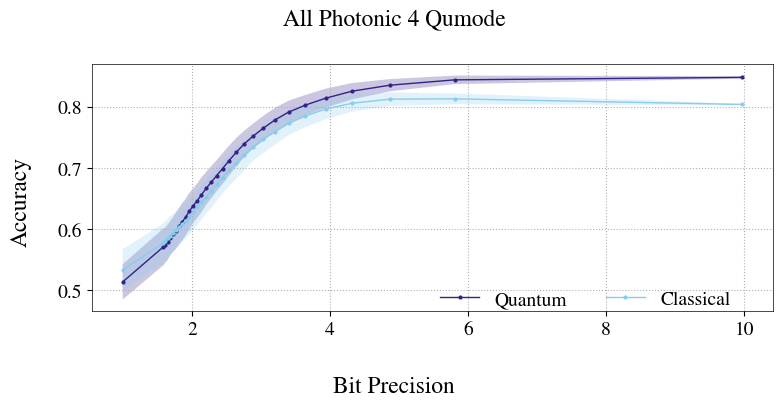

In [9]:
%matplotlib inline

x = np.array(df['sigma'].unique()).astype(float)
x = np.log2(1+1/x)

plot_df = pd.DataFrame(index=x)

mask = (df['PWB']==1) & (df['network_type']=='quantum') & (df['num_qumodes']==4)

acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['PWB']==1) & (df['network_type']=='classical') & (df['num_qumodes']==4)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']

plot_df['Ph Q Acc 4'] = acc_q.values
plot_df['Ph Q Acc Err 4'] = acc_err_q.values
plot_df['Ph Q Loss 4'] = loss_q.values
plot_df['Ph Q Loss Err 4'] = loss_err_q.values
plot_df['Ph C Acc 4'] = acc_c.values
plot_df['Ph C Acc Err 4'] = acc_err_c.values
plot_df['Ph C Loss 4'] = loss_c.values
plot_df['Ph C Loss Err 4'] = loss_err_c.values

Plot = MultiPlot([x,x], 
                 [acc_q, acc_c],
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=['Quantum', 'Classical'], 
                 yerr=[acc_err_q, acc_err_c],
                 title='All Photonic 4 Qumode',
                 legend_position_x=0.5,
                 legend_position_y=-0.02)
Plot.options["figure_size_x"] = 8
Plot.options["figure_size_y"] = 4
Plot.plot()


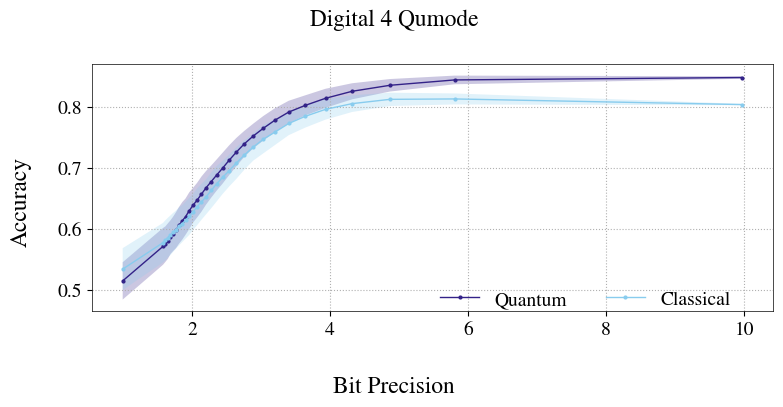

In [10]:
mask = (df['PWB']==0) & (df['network_type']=='quantum') & (df['num_qumodes']==4)

acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==4)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']


plot_df['TF Q Acc 4'] = acc_q.values
plot_df['TF Q Acc Err 4'] = acc_err_q.values
plot_df['TF Q Loss 4'] = loss_q.values
plot_df['TF Q Loss Err 4'] = loss_err_q.values
plot_df['TF C Acc 4'] = acc_c.values
plot_df['TF C Acc Err 4'] = acc_err_c.values
plot_df['TF C Loss 4'] = loss_c.values
plot_df['TF C Loss Err 4'] = loss_err_c.values

Plot = MultiPlot([x,x], 
                 [acc_q, acc_c],
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=['Quantum', 'Classical'], 
                 yerr=[acc_err_q, acc_err_c],
                 title='Digital 4 Qumode',
                 legend_position_x=0.5,
                 legend_position_y=-0.02)
Plot.options["figure_size_x"] = 8
Plot.options["figure_size_y"] = 4
Plot.plot()

<Figure size 800x400 with 0 Axes>

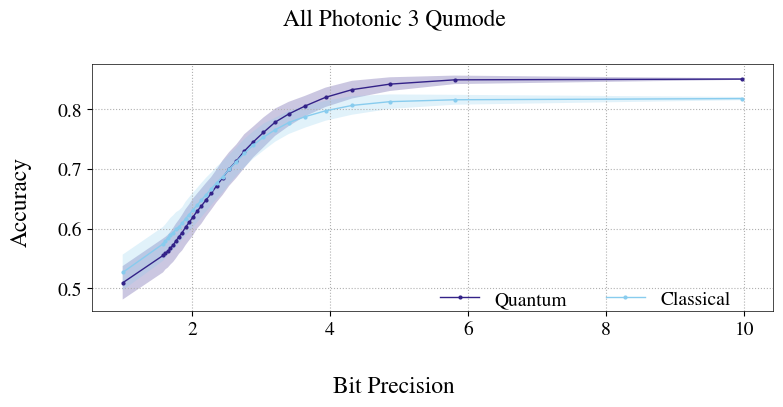

In [11]:
mask = (df['PWB']==1) & (df['network_type']=='quantum') & (df['num_qumodes']==3)

acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['PWB']==1) & (df['network_type']=='classical') & (df['num_qumodes']==3)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']

plot_df['Ph Q Acc 3'] = acc_q.values
plot_df['Ph Q Acc Err 3'] = acc_err_q.values
plot_df['Ph Q Loss 3'] = loss_q.values
plot_df['Ph Q Loss Err 3'] = loss_err_q.values
plot_df['Ph C Acc 3'] = acc_c.values
plot_df['Ph C Acc Err 3'] = acc_err_c.values
plot_df['Ph C Loss 3'] = loss_c.values
plot_df['Ph C Loss Err 3'] = loss_err_c.values

fig = plt.figure(
        figsize= (
                8,4))

Plot = MultiPlot([x,x], 
                 [acc_q, acc_c],
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=['Quantum', 'Classical'], 
                 yerr=[acc_err_q, acc_err_c],
                 title='All Photonic 3 Qumode',
                 legend_position_x=0.5,
                 legend_position_y=-0.02)
Plot.options["figure_size_x"] = 8
Plot.options["figure_size_y"] = 4
Plot.plot()

<Figure size 800x400 with 0 Axes>

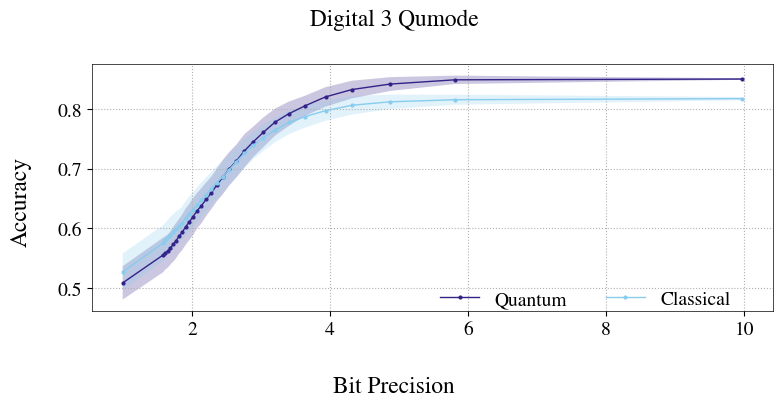

In [12]:
mask = (df['PWB']==0) & (df['network_type']=='quantum') & (df['num_qumodes']==3)

acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==3)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']

plot_df['TF Q Acc 3'] = acc_q.values
plot_df['TF Q Acc Err 3'] = acc_err_q.values
plot_df['TF Q Loss 3'] = loss_q.values
plot_df['TF Q Loss Err 3'] = loss_err_q.values
plot_df['TF C Acc 3'] = acc_c.values
plot_df['TF C Acc Err 3'] = acc_err_c.values
plot_df['TF C Loss 3'] = loss_c.values
plot_df['TF C Loss Err 3'] = loss_err_c.values

fig = plt.figure(
        figsize= (
                8,4))

Plot = MultiPlot([x,x], 
                 [acc_q, acc_c],
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=['Quantum', 'Classical'], 
                 yerr=[acc_err_q, acc_err_c],
                 title='Digital 3 Qumode',
                 legend_position_x=0.5,
                 legend_position_y=-0.02)
Plot.options["figure_size_x"] = 8
Plot.options["figure_size_y"] = 4
Plot.plot()

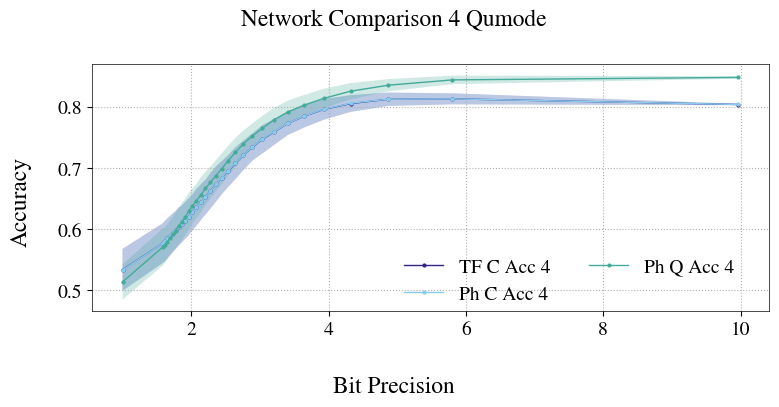

In [13]:
names = ['TF C Acc 4', 'Ph C Acc 4', 'Ph Q Acc 4']
names_err = [n.split(' ') for n in names]
[names_err[i].insert(-1, 'Err') for i,n in enumerate(names_err)]
names_err = [" ".join(names_err[i]) for i,n in enumerate(names_err)]

Plot = MultiPlot([plot_df.index for i in names], 
                 plot_df[names].values.T,
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=[*names], 
                 yerr=plot_df[names_err].values.T,
                 title='Network Comparison 4 Qumode',
                 legend_position_x=0.45,
                 legend_position_y=0.0)
Plot.options["figure_size_x"] = 8
Plot.options["figure_size_y"] = 4
Plot.plot()

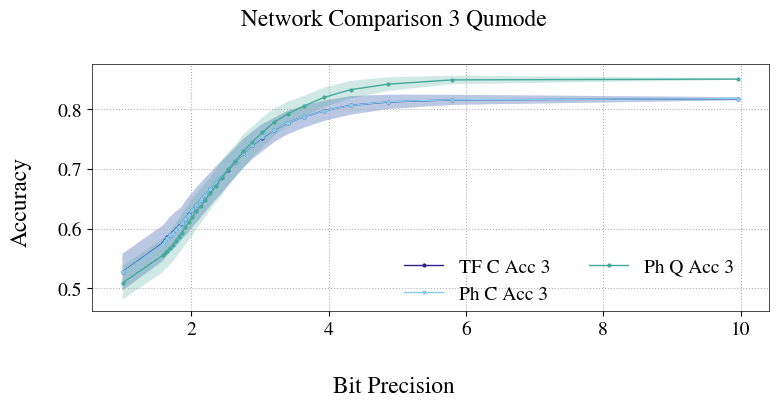

In [14]:
names = ['TF C Acc 3', 'Ph C Acc 3', 'Ph Q Acc 3']
names_err = [n.split(' ') for n in names]
[names_err[i].insert(-1, 'Err') for i,n in enumerate(names_err)]
names_err = [" ".join(names_err[i]) for i,n in enumerate(names_err)]

Plot = MultiPlot([plot_df.index for i in names], 
                 plot_df[names].values.T,
                 'Bit Precision', 
                 'Accuracy', 
                 legend_name=[*names], 
                 yerr=plot_df[names_err].values.T,
                 title='Network Comparison 3 Qumode',
                 legend_position_x=0.45,
                 legend_position_y=0.0)
Plot.options["figure_size_x"] = 8
Plot.options["figure_size_y"] = 4
Plot.plot()

In [24]:
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder("WINE_Noisy_Train2")
data1 = dbGen.data

config = data1[1]['config']
config.pop('__doc__', None)
df = pd.DataFrame(columns=config.keys())
df['acc'] = np.nan
df['loss'] = np.nan
df['val_acc'] = np.nan
df['val_loss'] = np.nan

for i in range(1, len(data1) + 1):
    config = data1[i]['config']
    config.pop('__doc__', None)
    metrics = data1[i]['metrics']
    metrics.pop('epoch',None)
    acc, loss, val_acc, val_loss = metrics.values()
    acc = np.max(acc)
    loss = np.max(loss)
    val_acc = np.max(val_acc)
    val_loss = np.max(-1)
    df.loc[i] = [*config.values(), acc, loss, val_acc, val_loss]
    
func = lambda x: np.log2(1 + 1/x)
df['sigma'] = df['sigma'].apply(func)
df.set_index('sigma', inplace=True)
df.sort_values('sigma', inplace=True)
df

,PWB,network_type,num_qumodes,acc,loss,val_acc,val_loss
sigma,,,,,,,
1.000000,0,classical,3,0.618068,0.687969,0.775000,-1
1.000000,0,classical,4,0.605546,0.700479,0.787500,-1
1.000000,0,quantum,4,0.609123,0.715825,0.795833,-1
1.000000,0,quantum,3,0.618068,0.728173,0.795833,-1
1.584963,0,classical,4,0.669052,0.672950,0.804167,-1
...,...,...,...,...,...,...,...
5.805402,0,quantum,4,0.868515,0.683779,0.833333,-1
9.967226,0,quantum,4,0.876565,0.683662,0.833333,-1
9.967226,0,classical,3,0.864043,0.620014,0.829167,-1


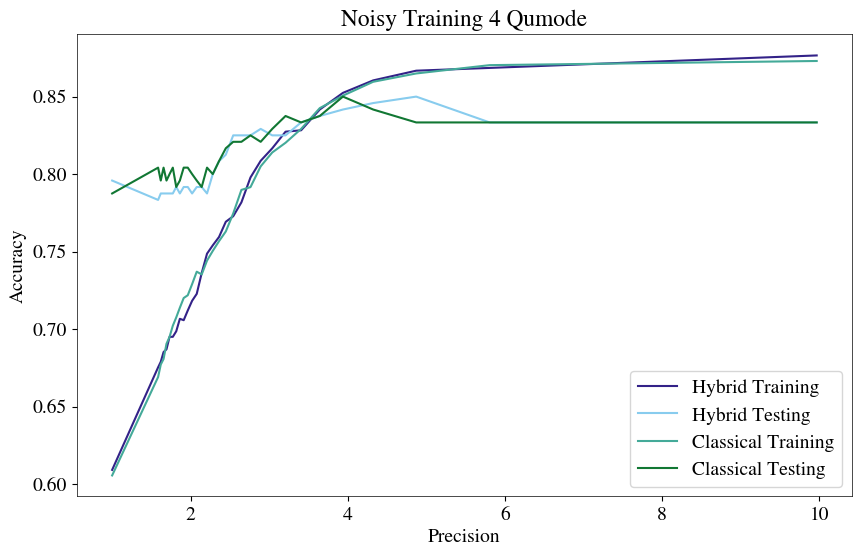

Text(0.5, 1.0, 'Effect of Noise 3 Qumode')

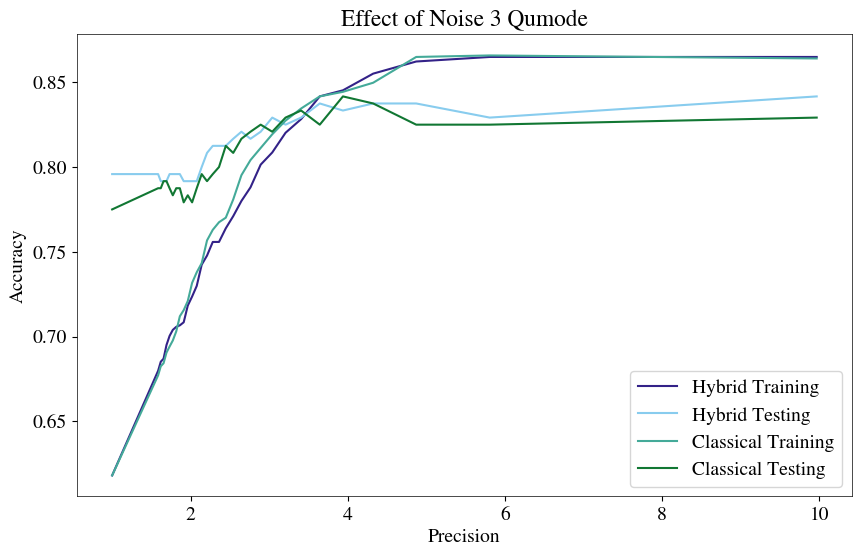

In [25]:
%matplotlib inline
mask = (df['PWB']==0) & (df['network_type']=='quantum') & (df['num_qumodes']==4)
quantum = df[mask]
mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==4)
classical = df[mask]
names = ['acc', 'val_acc']

fig = plt.figure(
    figsize=(10,6))
plt.plot(quantum['acc'], label='Hybrid Training')
plt.plot(quantum['val_acc'], label='Hybrid Testing')
plt.plot(classical['acc'], label='Classical Training')
plt.plot(classical['val_acc'], label='Classical Testing')
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Accuracy')
plt.title('Noisy Training 4 Qumode')
plt.show()

mask = (df['PWB']==0) & (df['network_type']=='quantum') & (df['num_qumodes']==3)
quantum = df[mask]
mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==3)
classical = df[mask]
names = ['acc', 'val_acc']

fig = plt.figure(
    figsize=(10,6))
plt.plot(quantum['acc'], label='Hybrid Training')
plt.plot(quantum['val_acc'], label='Hybrid Testing')
plt.plot(classical['acc'], label='Classical Training')
plt.plot(classical['val_acc'], label='Classical Testing')
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Accuracy')
plt.title('Effect of Noise 3 Qumode')

In [17]:
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder("WINE_Noisy_Train2")
data1 = dbGen.data

config = data1[1]['config']
config.pop('__doc__', None)
df = pd.DataFrame(columns=config.keys())
df['acc'] = np.nan
df['loss'] = np.nan
df['val_acc'] = np.nan
df['val_loss'] = np.nan

for i in range(1, len(data1) + 1):
    config = data1[i]['config']
    config.pop('__doc__', None)
    metrics = data1[i]['metrics']
    metrics.pop('epoch',None)
    acc, loss, val_acc, val_loss = metrics.values()
    df.loc[i] = [*config.values(), acc, loss, val_acc, val_loss]

func = lambda x: np.log2(1 + 1/x)
df['sigma'] = df['sigma'].apply(func)
df.set_index('sigma', inplace=True)
df.sort_values('sigma', inplace=True)

mask = (df['PWB']==0) & (df['network_type']=='quantum') & (df['num_qumodes']==4)
quantum = df[mask]
mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==4)
classical = df[mask]

(0.4, 1.0)

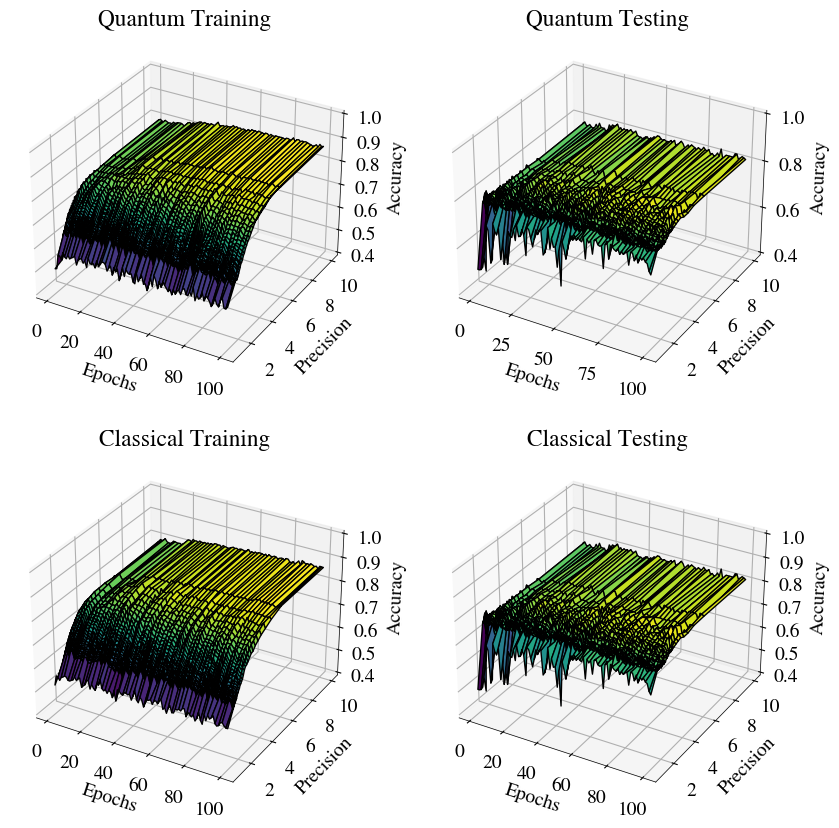

In [20]:
%matplotlib inline
fig = plt.figure(
    figsize=(10,10)
)
ax = fig.add_subplot(2,2,1,projection='3d')
epochs = np.arange(1, 101, 1)
acc, val_acc = quantum['acc'].values, classical['val_acc'].values
acc = np.stack(acc)
val_acc = np.stack(val_acc)
prec = quantum.index
X, Y = np.meshgrid(epochs, prec)

ax.plot_surface(X, Y, acc, cmap='viridis', edgecolor='k')

ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax.set_zlabel('Accuracy')
ax.set_title("Quantum Training")
ax.set_zlim(0.4,1)

ax = fig.add_subplot(2,2,2,projection='3d')
ax.plot_surface(X, Y, val_acc, cmap='viridis', edgecolor='k')

ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax.set_zlabel('Accuracy')
ax.set_title('Quantum Testing')
ax.set_zlim(0.4,1)

ax = fig.add_subplot(2,2,3,projection='3d')

acc = np.stack(classical['acc'])
val_acc = np.stack(classical['val_acc'])
ax.plot_surface(X, Y, acc, cmap='viridis', edgecolor='k')
ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax.set_zlabel('Accuracy')
ax.set_title("Classical Training")
ax.set_zlim(0.4,1)

ax = fig.add_subplot(2,2,4,projection='3d')
ax.plot_surface(X, Y, val_acc, cmap='viridis', edgecolor='k')
ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax.set_zlabel('Accuracy')
ax.set_title('Classical Testing')
ax.set_zlim(0.4,1)

<Figure size 300x300 with 0 Axes>

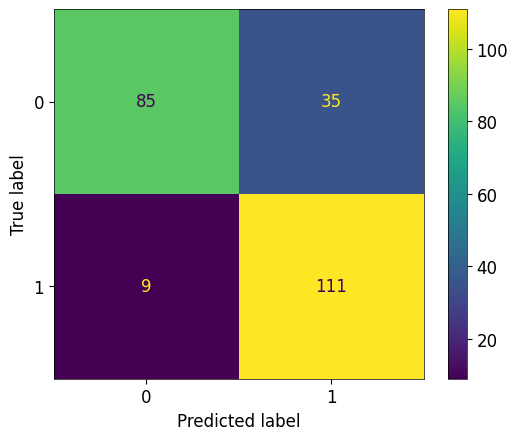

In [8]:
from common_packages.CV_quantum_layers import Activation_Layer, CV_Measurement, QuantumLayer_MultiQunode
from PWBLayer_TF import PWBLinearLayer
from keras import Model, layers, models, regularizers
from common_packages.utilities import get_equivalent_classical_layer_size
from hybrid_base import EXPERIMENT_NAME as BASE_EXPERIMENT_NAME
from hybrid_base import LOSS_FUNCTION, NUM_EPOCHS, OPTIMIZER, RANDOM_SEED
import tensorflow as tf
import copy
import json
from os import listdir
from os.path import isdir, join
from hybrid_pwb import get_config
from sklearn.metrics import ConfusionMatrixDisplay
from WINE_Dataset import *
network_type = 'classical'
num_qumodes = 4

class Net(Model):  # pylint: disable=W0223
        """Neural network model to train on"""

        def __init__(self):
            super().__init__()
            self._estimator_type = 'classifier'

            self.base_model = models.Sequential(
                [
                    layers.Dense(
                        40,
                        input_dim=9,
                        activation="relu",
                        bias_constraint=lambda t: tf.clip_by_value(t, -1.0, 1.0),
                        kernel_constraint=lambda t: tf.clip_by_value(t, -1.0, 1.0)
                        ),
                ]
            )
            
            self.classical1 = models.Sequential([
                    layers.Flatten(),
                    layers.Dense(
                        2 * num_qumodes,
                        activation=None,
                        bias_constraint=lambda t: tf.clip_by_value(t, -1.0, 1.0),
                        kernel_constraint=lambda t: tf.clip_by_value(t, -1.0, 1.0)
                    )
            ])
            
            classical_size = get_equivalent_classical_layer_size(num_qumodes, 2*num_qumodes, 2)
            if network_type == "classical":
                self.quantum_substitue = models.Sequential(
                    [
                        layers.Dense(
                            classical_size,
                            activation="relu",
                            bias_constraint=lambda t: tf.clip_by_value(t, -1.0, 1.0),
                            kernel_constraint=lambda t: tf.clip_by_value(t, -1.0, 1.0)
                        ),
                    ]
                )
            if network_type=='quantum':
                self.quantum_layer = QuantumLayer_MultiQunode(
                    n_qumodes=num_qumodes,
                    n_circuits=1,
                    n_layers=1,
                    cutoff_dim=5,
                    encoding_method="Amplitude_Phase",
                    regularizer=regularizers.L1(l1=0.01),
                    max_initial_weight=0.2,
                    measurement_object=CV_Measurement("X_quadrature"),
                    shots=None,
                )

                self.quantum_preparation_layer = Activation_Layer("TanH", self.quantum_layer.encoding_object)

            self.classical2 = layers.Dense(
                        2,
                        activation="softmax",
                        bias_constraint=lambda t: tf.clip_by_value(t, -1.0, 1.0),
                        kernel_constraint=lambda t: tf.clip_by_value(t, -1.0, 1.0)
                    )

        def call(self, inputs):  # pylint: disable=W0221
            """Call the network"""
            output = self.base_model(inputs)
            output = self.classical1(output)
            if network_type == "quantum":
                output = self.quantum_preparation_layer(output)
                output = self.quantum_layer(output)
            elif network_type == "classical":
                output = self.quantum_substitue(output)
            else:
                raise ValueError("Invalid network type specified.")
            output = self.classical2(output)
            output = tf.argmax(output, axis=-1)
            return output

x_train, x_test, y_train, y_test = prepare_dataset()
model = Net()
model.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION, metrics=["accuracy"])
sub_folders = [folder for folder in listdir(BASE_EXPERIMENT_NAME) if isdir(join(BASE_EXPERIMENT_NAME, folder))]
experiment_numbers = [sub_folder for sub_folder in sub_folders if sub_folder.isdigit()]
target_experiment_path_list = []
predictions = []
for experiment_num in experiment_numbers:
    config = get_config(f"{BASE_EXPERIMENT_NAME}/{experiment_num}")
    if config["num_qumodes"] == num_qumodes and config["network_type"] == network_type:
        target_experiment_path_list.append(f"{BASE_EXPERIMENT_NAME}/{experiment_num}")

target_experiment_path = target_experiment_path_list[0]
model.load_weights(f"{target_experiment_path}/weights/weight{NUM_EPOCHS-1}.ckpt", by_name=False)

x = x_test
y = tf.argmax(y_test, axis=-1)
fig = plt.figure(figsize=(3,3))
ConfusionMatrixDisplay.from_estimator(model, X=x, y=y)
plt.savefig('wine_confusion.pdf')
plt.show()
